### Загрузим данные:

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from estimators import DelayEstimator, EmbeddingDimensionEstimator
from delay_embedding import plot_delay_embedding
from data_provider.data_loader import Dataset_Custom

X = Dataset_Custom(
    root_path='../dataset/',
    data_path='electricity.csv',
    flag='train',
    features='M'
).data_x

### Вычислим tau:

Первый локальный минимум τ: 6
Первый локальный максимум τ: 12


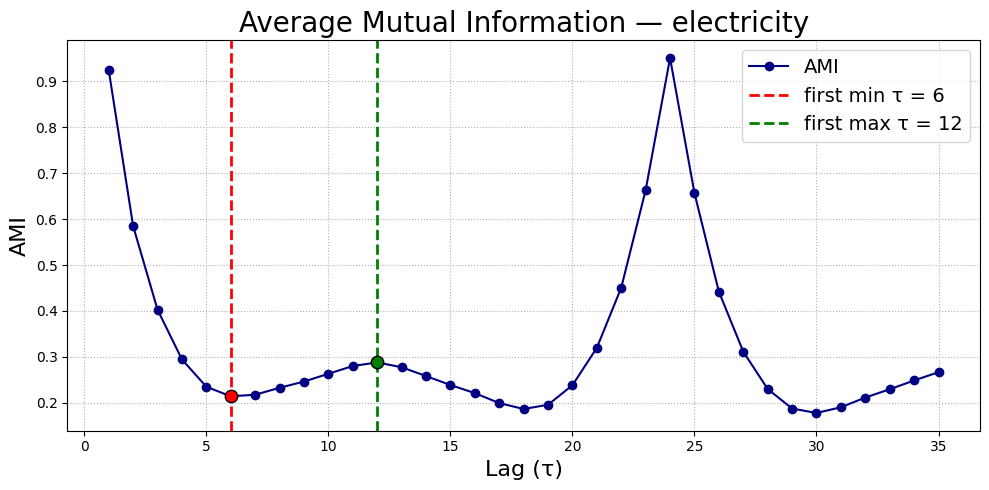

In [2]:
delay_est = DelayEstimator(max_tau=35, data_name="electricity").fit(X)
print(f"Первый локальный минимум τ: {delay_est.tau_min}")
print(f"Первый локальный максимум τ: {delay_est.tau_max}")
delay_est.plot()

### Вычислим m:

Оптимальная размерность m: 29
Покрытие каналов: 95.6%


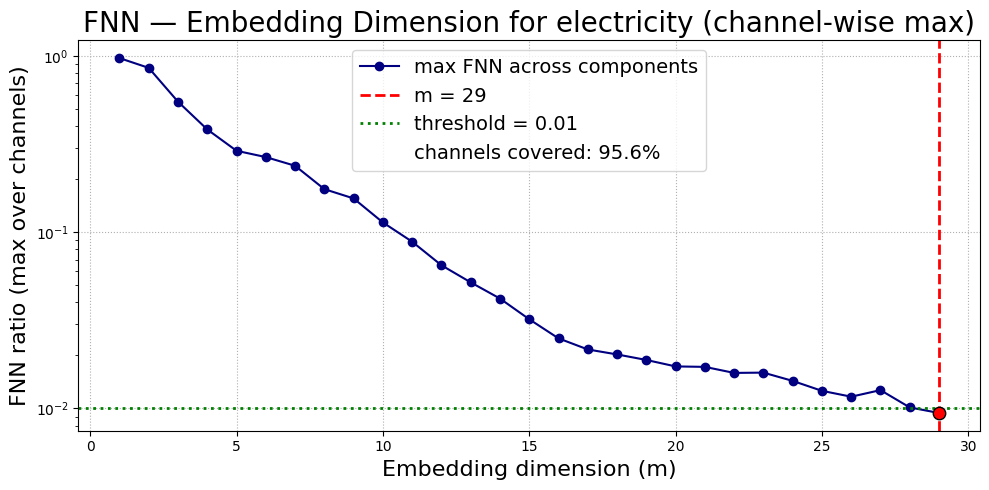

In [4]:
dim_est = EmbeddingDimensionEstimator(tau=delay_est.tau_min, m_max=30, data_name="electricity", multivariate=False).fit(X)
print(f"Оптимальная размерность m: {dim_est.m_opt}")
print(f"Покрытие каналов: {dim_est.coverage_ratio * 100:.1f}%")
dim_est.plot()

### Визуализируем полученные эмбеддинги:

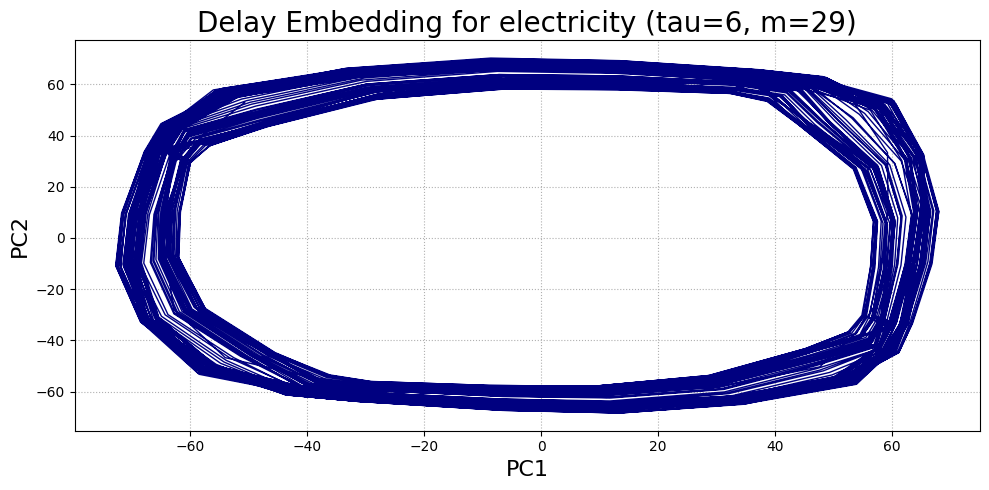

In [9]:
plot_delay_embedding(X, tau=delay_est.tau_min, m=dim_est.m_opt, data_name="electricity", right=2000)

### Визуализируем оптимальные эмбеддинги:

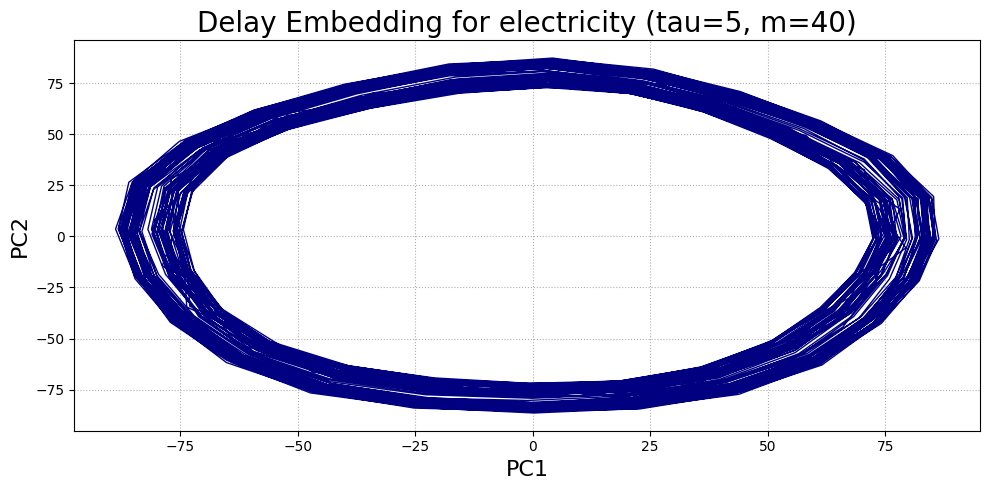

In [21]:
plot_delay_embedding(X, tau=5, m=40, data_name="electricity", right=2000)

### Визуализируем эмбеддинги из оригинальной статьи:

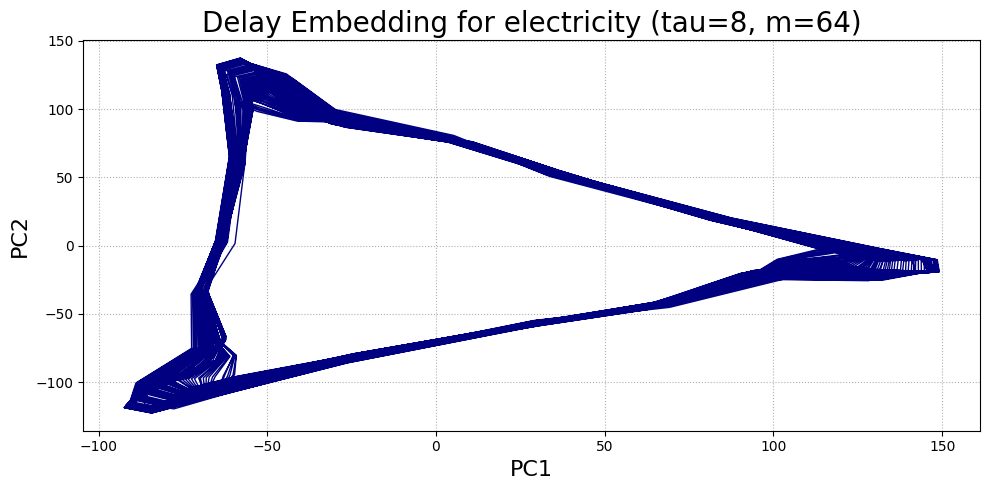

In [12]:
plot_delay_embedding(X, tau=8, m=64, data_name="electricity", right=2000)

Видим, что полученные нами эмбеддинги лучше, чем предложенные в оригинальной статье, однако оптимальные эмбеддинги заметно лучше обоих вариантов.